In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Total population by county information/projections 
#data found from: http://atlantaregional.org/population-employment-forecasts/ 

In [4]:
df2015 = pd.read_csv('pop2015.csv')
df2015.head()

,COUNTY,Pop2015
0,Barrow,75103
1,Bartow,110448
2,Carroll,116236
3,Cherokee,233231
4,Clayton,266888


In [5]:
df2020 = pd.read_csv('pop2020.csv')
df2020.head()

,COUNTY,Pop2020
0,Barrow,89116
1,Bartow,129833
2,Carroll,127672
3,Cherokee,267877
4,Clayton,278857


In [6]:
df2030 = pd.read_csv('pop2030.csv')
df2030.head()

,COUNTY,Pop2030
0,Barrow,113716
1,Bartow,159188
2,Carroll,148685
3,Cherokee,332649
4,Clayton,300720


In [7]:
df2040 = pd.read_csv('pop2040.csv')
df2040.rename(columns = {'County':'COUNTY'},inplace=True)
# https://stackoverflow.com/questions/19758364/python-rename-single-column-header-in-pandas-dataframe 

In [8]:
##merging dataframes together 
df_full = df2015.merge(df2020,on='COUNTY').merge(df2030,on='COUNTY').merge(df2040,on='COUNTY')
df_full

,COUNTY,Pop2015,Pop2020,Pop2030,Pop2040
0,Barrow,75103,89116,113716,135696
1,Bartow,110448,129833,159188,179084
2,Carroll,116236,127672,148685,166926
3,Cherokee,233231,267877,332649,392411
4,Clayton,266888,278857,300720,327552
5,Cobb,727521,739106,801831,885062
6,Coweta,141156,163781,205753,239808
7,DeKalb,718442,725987,797405,874424
8,Douglas,137343,148306,174525,201325
9,Fayette,110975,113128,126837,143255


In [9]:
#df_full.set_index('COUNTY', inplace=True)

In [10]:
df_full.set_index('COUNTY',inplace=True)

In [11]:
df_percent = df_full.pct_change(axis=1)
df_percent

,Pop2015,Pop2020,Pop2030,Pop2040
COUNTY,,,,
Barrow,NaN,0.186584,0.276045,0.193289
Bartow,NaN,0.175512,0.226098,0.124984
Carroll,NaN,0.098386,0.164586,0.122682
Cherokee,NaN,0.148548,0.241798,0.179655
Clayton,NaN,0.044847,0.078402,0.089226
Cobb,NaN,0.015924,0.084866,0.103801
Coweta,NaN,0.160284,0.256269,0.165514
DeKalb,NaN,0.010502,0.098374,0.096587
Douglas,NaN,0.079822,0.176790,0.153560


In [15]:
df_percent.fillna(value=0,inplace=True)

In [16]:
df_percent

,Pop2015,Pop2020,Pop2030,Pop2040
COUNTY,,,,
Barrow,0.0,0.186584,0.276045,0.193289
Bartow,0.0,0.175512,0.226098,0.124984
Carroll,0.0,0.098386,0.164586,0.122682
Cherokee,0.0,0.148548,0.241798,0.179655
Clayton,0.0,0.044847,0.078402,0.089226
Cobb,0.0,0.015924,0.084866,0.103801
Coweta,0.0,0.160284,0.256269,0.165514
DeKalb,0.0,0.010502,0.098374,0.096587
Douglas,0.0,0.079822,0.176790,0.153560


In [12]:
#del df_full['Pop2015']

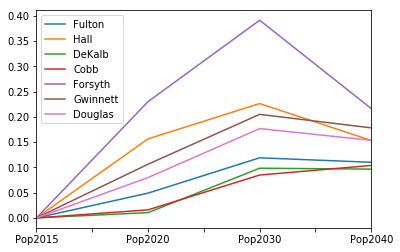

In [30]:
ax = df_percent.loc['Fulton'].plot(legend=True)
df_percent.loc['Hall'].plot(legend=True)
df_percent.loc['DeKalb'].plot(legend=True)
df_percent.loc['Cobb'].plot(legend=True)
df_percent.loc['Forsyth'].plot(legend=True)
df_percent.loc['Gwinnett'].plot(legend=True)
df_percent.loc['Douglas'].plot(legend=True)
plt.savefig('countypercentchange.svg')